In [39]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

In [40]:
df1 = pd.read_csv("D:/Masters/Jashwanth/Spring-23/Project/Data/raw_data.csv")
df2 = pd.read_csv("D:/Masters/Jashwanth/Spring-23/Project/Data/transformed_data.csv")

In [41]:
df1.head()

,iso_code,location,date,total_cases,total_deaths,stringency_index,population,gdp_per_capita,human_development_index,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,AFG,Afghanistan,2019-12-31,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
1,AFG,Afghanistan,2020-01-01,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
2,AFG,Afghanistan,2020-01-02,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
3,AFG,Afghanistan,2020-01-03,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
4,AFG,Afghanistan,2020-01-04,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494


In [42]:
import datetime as dt
df1["date"] = pd.to_datetime(df1['date'])
df1["year"] = df1["date"].map(lambda x: x.year)
df1["month"] = df1["date"].map(lambda x: x.month)

In [43]:
## Drop columns with no column name 
df1.drop('Unnamed: 9', inplace=True, axis=1)
df1.drop('Unnamed: 10', inplace=True, axis=1)
df1.drop('Unnamed: 11', inplace=True, axis=1)
df1.drop('Unnamed: 12', inplace=True, axis=1)
df1.drop('Unnamed: 13', inplace=True, axis=1)

In [44]:
df2.head()

,CODE,COUNTRY,DATE,HDI,TC,TD,STI,POP,GDPCAP
0,AFG,Afghanistan,2019-12-31,0.498,0.0,0.0,0.0,17.477233,7.497754
1,AFG,Afghanistan,2020-01-01,0.498,0.0,0.0,0.0,17.477233,7.497754
2,AFG,Afghanistan,2020-01-02,0.498,0.0,0.0,0.0,17.477233,7.497754
3,AFG,Afghanistan,2020-01-03,0.498,0.0,0.0,0.0,17.477233,7.497754
4,AFG,Afghanistan,2020-01-04,0.498,0.0,0.0,0.0,17.477233,7.497754


In [45]:
print('\n', df1.isna().sum())
print('\n', df2.isna().sum())


 iso_code                       0
location                       0
date                           0
total_cases                 3094
total_deaths               11190
stringency_index            7126
population                     0
gdp_per_capita              5712
human_development_index     6202
year                           0
month                          0
dtype: int64

 CODE          0
COUNTRY       0
DATE          0
HDI        6202
TC            0
TD            0
STI           0
POP           0
GDPCAP        0
dtype: int64


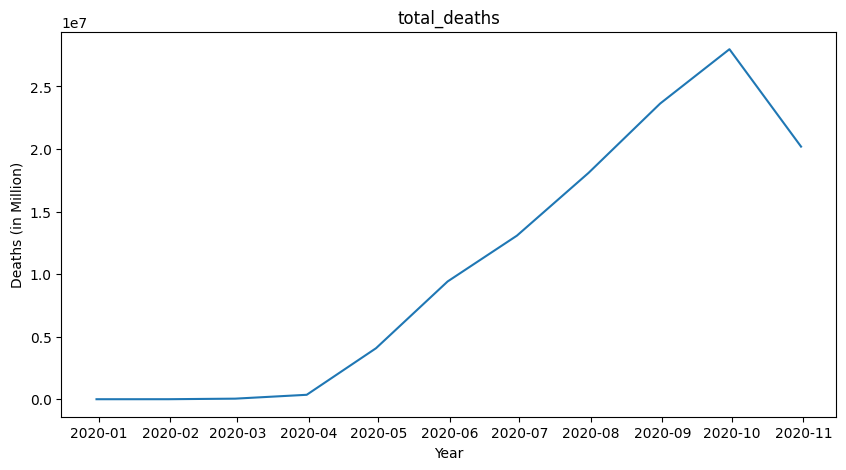

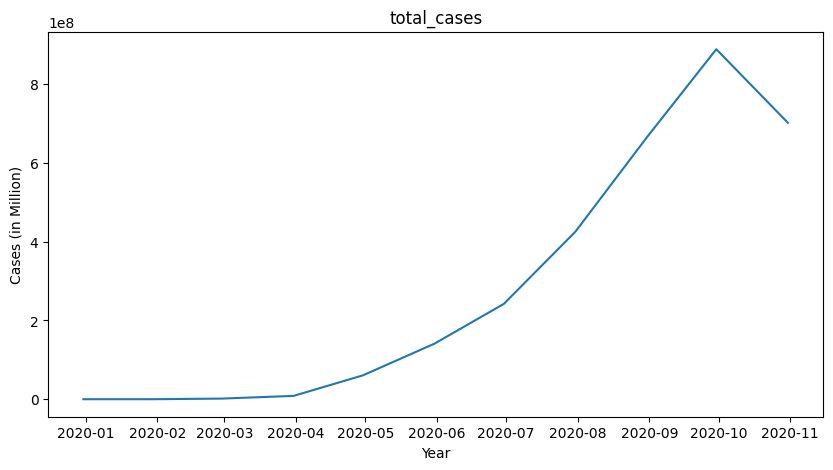

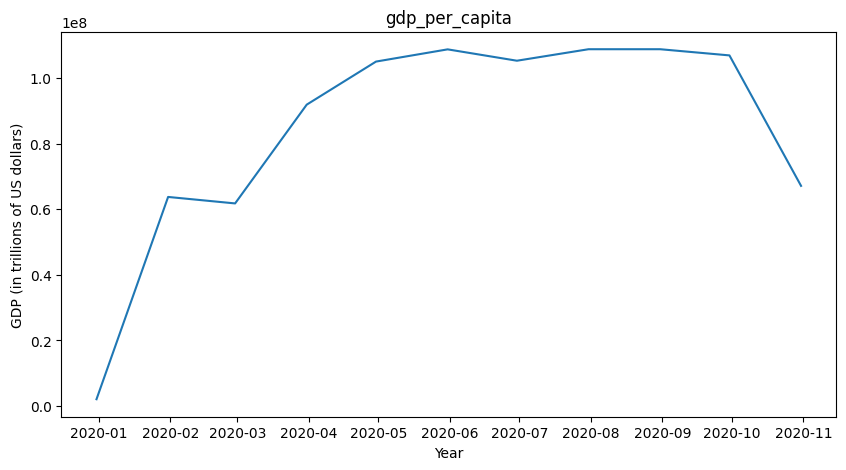

In [46]:

# Load the data
data = pd.read_csv('D:/Masters/Jashwanth/Spring-23/Project/Data/raw_data.csv', parse_dates=['date'])

# Set the date column as index
data.set_index('date', inplace=True)

# Resample the data to monthly frequency
data_monthly = data.resample('M').sum()

# Plot the data for total deaths
y_lable = {'total_deaths' : 'Deaths (in Million)', 'total_cases' : 'Cases (in Million)', 'gdp_per_capita' : 'GDP (in trillions of US dollars)'}
for i in ['total_deaths','total_cases','gdp_per_capita']:
    plt.figure(figsize=(10, 5))
    plt.plot(data_monthly[i])
    plt.title(i)
    plt.xlabel('Year')
    plt.ylabel(y_lable[i])
    plt.show()

In [47]:
# Forward-fill the missing values
df1 = df1.fillna(method='ffill') 
df2 = df2.fillna(method='ffill')

In [48]:
print('\n', df1.isna().sum())
print("*"*50)
print('\n', df2.isna().sum())


 iso_code                   0
location                   0
date                       0
total_cases                0
total_deaths               0
stringency_index           0
population                 0
gdp_per_capita             0
human_development_index    0
year                       0
month                      0
dtype: int64
**************************************************

 CODE       0
COUNTRY    0
DATE       0
HDI        0
TC         0
TD         0
STI        0
POP        0
GDPCAP     0
dtype: int64


In [49]:
code = df2["CODE"].unique().tolist()
country = df2["COUNTRY"].unique().tolist()
population = df2["POP"].unique().tolist()
gdp = df2["GDPCAP"].unique().tolist()
hdi = []
tc = []
td = []
sti = []

for i in country:
    hdi.append(((df2.loc[df2["COUNTRY"] == i, "HDI"]).sum())/294)
    tc.append((df1.loc[df1["location"] == i, "total_cases"]).sum())
    td.append((df1.loc[df1["location"] == i, "total_deaths"]).sum())
    sti.append((df2.loc[df2["COUNTRY"] == i, "STI"]).sum()/294)

In [50]:
agg_data = pd.DataFrame(list(zip(code,country,population,tc,td,sti,gdp,hdi)),
                           columns = ["Country_code", "Country", "Total_Population", "Total_Cases","Total_deaths","Stringency_Index","GDP", "Human_Index"]
                       )
agg_data.head()

,Country_code,Country,Total_Population,Total_Cases,Total_deaths,Stringency_Index,GDP,Human_Index
0,AFG,Afghanistan,17.477233,5126433.0,165875.0,3.049673,7.497754,0.498000
1,ALB,Albania,14.872537,1071951.0,35532.0,3.005624,9.376146,0.600765
2,DZA,Algeria,17.596309,5866211.0,239352.0,3.195168,9.540639,0.754000
3,AND,Andorra,11.254996,223583.0,45114.0,2.677654,0.000000,0.659551
4,AGO,Angola,17.307957,304005.0,12292.0,2.965560,8.668969,0.418952


In [51]:
top_df = agg_data.sort_values(by=["Total_Cases"], ascending = False )
top_ten = top_df.head(10)
top_ten.head()

,Country_code,Country,Total_Population,Total_Cases,Total_deaths,Stringency_Index,GDP,Human_Index
91,IDN,Indonesia,19.426899,489687127.0,9168032.0,3.640149,11.090272,0.69400
27,BRA,Brazil,19.174732,426003311.0,14342127.0,3.136028,9.828942,0.75900
90,IND,India,21.045353,407893299.0,7248130.0,3.610552,9.189712,0.64000
157,RUS,Russia,18.798668,138661367.0,2642435.0,3.380088,7.358760,0.81600
150,PER,Peru,17.311165,75320488.0,3044986.0,3.430126,11.356685,0.59949


In [52]:

## Bar chart 
fig1 = px.bar(top_ten, x = 'Country', y = 'Total_deaths',
                 hover_data = ['Total_Cases','GDP'], color = 'Total_Cases',
                 labels = {'Total_deaths':'Total deaths of the country'}, height = 400
             )
fig1.show()

In [53]:
## Top ten country with highest Population
pop_df = agg_data.sort_values(by = ['Total_Population'], ascending = False)
top_pop= pop_df.head(10)
top_pop

,Country_code,Country,Total_Population,Total_Cases,Total_deaths,Stringency_Index,GDP,Human_Index
41,CHN,China,21.087439,21632319.0,1216924.0,3.892554,8.493189,0.752000
90,IND,India,21.045353,407893299.0,7248130.0,3.610552,9.189712,0.640000
91,IDN,Indonesia,19.426899,489687127.0,9168032.0,3.640149,11.090272,0.694000
145,PAK,Pakistan,19.213186,44115377.0,877637.0,3.385802,10.800502,0.562000
27,BRA,Brazil,19.174732,426003311.0,14342127.0,3.136028,9.828942,0.759000
141,NGA,Nigeria,19.144064,6178776.0,131269.0,3.504161,9.468993,0.532000
15,BGD,Bangladesh,18.919572,35733608.0,490234.0,3.186410,9.739678,0.477714
157,RUS,Russia,18.798668,138661367.0,2642435.0,3.380088,7.358760,0.816000
125,MEX,Mexico,18.674802,74353246.0,7296660.0,3.019289,10.544307,0.774000
99,JPN,Japan,18.655567,7659484.0,194918.0,3.178414,10.292968,0.909000


In [54]:

fig2 = px.bar(top_pop, x = 'Country', y = 'Total_Population', text_auto = '.2s',
                     title = "Total Population by Countries"
             )
fig2.show()

In [55]:
TC = top_pop["Total_Cases"]
TD = top_pop["Total_deaths"]
CO = top_pop["Country"]
PO = top_pop["Total_Population"]

In [56]:
Total = pd.DataFrame(list(zip(CO,PO,TC,TD)), columns = ['Countries','Total Population','Cases', 'Deaths'])
Total1= Total.copy()
Total1

,Countries,Total Population,Cases,Deaths
0,China,21.087439,21632319.0,1216924.0
1,India,21.045353,407893299.0,7248130.0
2,Indonesia,19.426899,489687127.0,9168032.0
3,Pakistan,19.213186,44115377.0,877637.0
4,Brazil,19.174732,426003311.0,14342127.0
5,Nigeria,19.144064,6178776.0,131269.0
6,Bangladesh,18.919572,35733608.0,490234.0
7,Russia,18.798668,138661367.0,2642435.0
8,Mexico,18.674802,74353246.0,7296660.0
9,Japan,18.655567,7659484.0,194918.0


In [57]:
fig6 = px.bar(Total1, x='Countries', y=['Cases', 'Deaths'])
fig6.show()

In [58]:
fig6 = px.pie(Total1, values='Cases', names='Countries', title='Total Covid Cases of the World', color_discrete_sequence=px.colors.sequential.RdBu)
fig6.show()

Text(0.5, 1.0, 'Relation between HDI and GDP per capita')

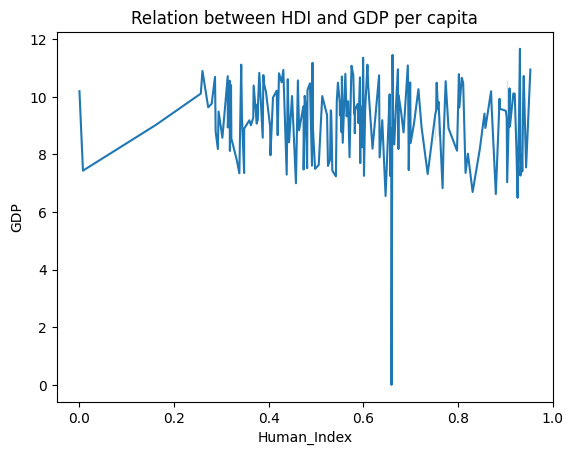

In [59]:
sns.lineplot(data=agg_data[['Human_Index', 'GDP']], x="Human_Index", y="GDP").set_title('Relation between HDI and GDP per capita')

In [60]:
fig = px.scatter(agg_data, x="GDP", y="Total_Population", size="Total_Cases",  color='Country', template='simple_white', size_max=50)
fig.update_layout(
    height=500,
    title_text="COVID-19 Cases vs GDP per Capita (per Country)"
)
fig.show()

## Modelling

In [61]:
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn import svm, metrics, tree, linear_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error

In [78]:
df1.head()

,iso_code,location,date,total_cases,total_deaths,stringency_index,population,gdp_per_capita,human_development_index,year,month
0,AFG,Afghanistan,2019-12-31,0.0,0.0,0.0,0.027046,0.009828,0.52256,0.0,1.0
1,AFG,Afghanistan,2020-01-01,0.0,0.0,0.0,0.027046,0.009828,0.52256,1.0,0.0
2,AFG,Afghanistan,2020-01-02,0.0,0.0,0.0,0.027046,0.009828,0.52256,1.0,0.0
3,AFG,Afghanistan,2020-01-03,0.0,0.0,0.0,0.027046,0.009828,0.52256,1.0,0.0
4,AFG,Afghanistan,2020-01-04,0.0,0.0,0.0,0.027046,0.009828,0.52256,1.0,0.0


In [63]:
scaler = MinMaxScaler()

num_vars =['total_cases','total_deaths','stringency_index','population','gdp_per_capita','human_development_index','year','month']
df1[num_vars] = scaler.fit_transform(df1[num_vars])

X = df1.drop(['iso_code','date','location','gdp_per_capita'], axis=1)
y= df1['gdp_per_capita']



# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)



## Linear Regressor

In [64]:
linear_regressor = LinearRegression().fit(X_train, y_train)

pred = linear_regressor.predict(X_test)

r23 = r2_score(y_test, pred)

print('R2 Score -', r23)

mae = mean_absolute_error(y_test, pred)
print('mae -', mae)

mse = mean_squared_error(y_test, pred)
print('mse -', mse)

rmse = np.sqrt(mse)
print('rmse -', rmse)

R2 Score - 0.4550713983432564
mae - 0.08335022317619371
mse - 0.01685656602173681
rmse - 0.1298328387648395


Text(0, 0.5, 'pred')

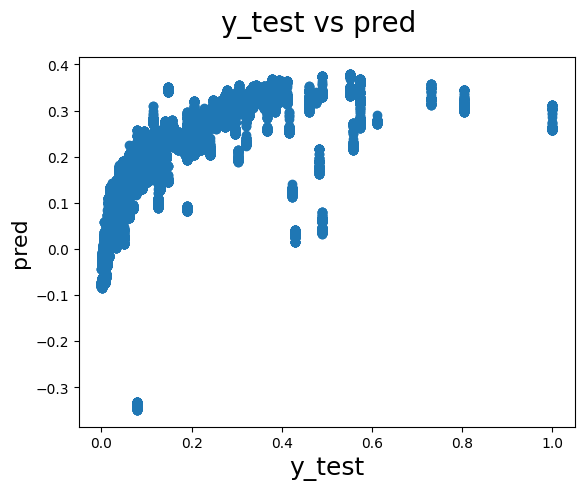

In [65]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,pred)
fig.suptitle('y_test vs pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('pred', fontsize=16)   

## Decision Tree regressor

In [66]:
decision_tree_regressor = tree.DecisionTreeRegressor().fit(X_train, y_train)

pred = decision_tree_regressor.predict(X_test)

r22 = r2_score(y_test, pred)

print('R2 Score -', r22)

mae = mean_absolute_error(y_test, pred)
print('mae -', mae)

mse = mean_squared_error(y_test, pred)
print('mse -', mse)

rmse = np.sqrt(mse)
print('rmse -', rmse)

R2 Score - 0.9999970679519812
mae - 2.1206494015646944e-06
mse - 9.069859951949215e-08
rmse - 0.0003011620818089358


Text(0, 0.5, 'pred')

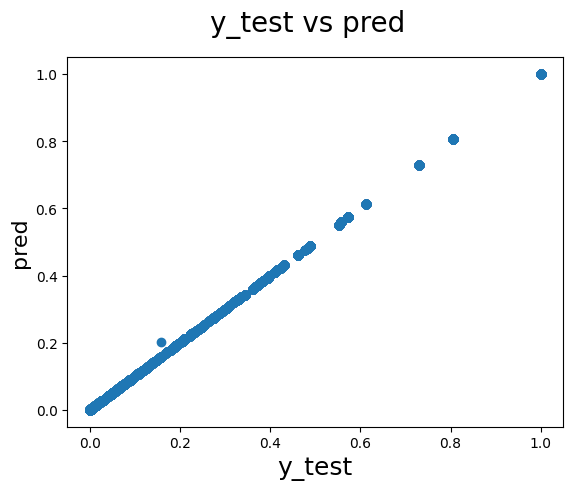

In [67]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,pred)
fig.suptitle('y_test vs pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('pred', fontsize=16)   

## SVM regressor

In [68]:
svr_regressor = svm.SVR().fit(X_train, y_train)

pred = svr_regressor.predict(X_test)

r21 = r2_score(y_test, pred)

print('R2 Score -', r21)

mae = mean_absolute_error(y_test, pred)
print('mae -', mae)

mse = mean_squared_error(y_test, pred)
print('mse -', mse)

rmse = np.sqrt(mse)
print('rmse -', rmse)

R2 Score - 0.5561854181485336
mae - 0.08098234291619669
mse - 0.013728752312952074
rmse - 0.1171697585256199


Text(0, 0.5, 'pred')

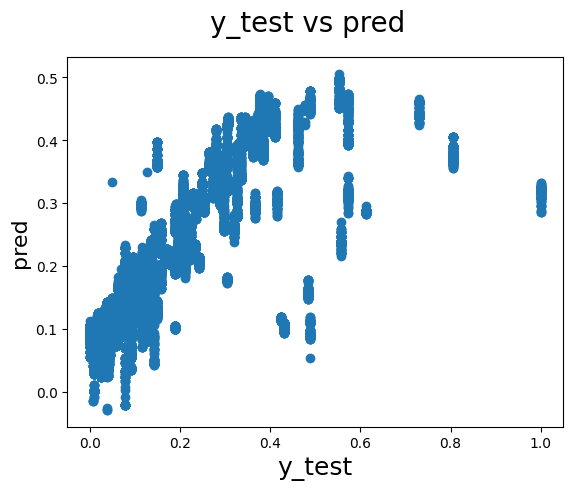

In [69]:

# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,pred)
fig.suptitle('y_test vs pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('pred', fontsize=16)   

## XG Boost

In [70]:

train, test = train_test_split(df1, test_size=0.2, random_state=123)
# Define the features and target variable

features = ['total_cases','total_deaths','stringency_index','population','gdp_per_capita','human_development_index']
target = 'gdp_per_capita'

# Convert the data to DMatrix format for XGBoost
dtrain = xgb.DMatrix(train[features], label=train[target])
dtest = xgb.DMatrix(test[features], label=test[target])

# Set the XGBoost parameters
params = {
    'objective': 'reg:squarederror',
    'max_depth': 3,
    'eta': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 123
}

# Train the XGBoost model
model = xgb.train(params, dtrain, num_boost_round=100)

# Predict the target variable on the test set
y_pred = model.predict(dtest)

r21 = r2_score(test[target], y_pred)

print('R2 Score -', r21)

mae = mean_absolute_error(test[target], y_pred)
print('MAE -', mae)

mse = mean_squared_error(test[target], y_pred)
print('MSE -', mse)

rmse = np.sqrt(mse)
print('RMSE -', rmse)



R2 Score - 0.999506960743297
MAE - 0.002856963030072846
MSE - 1.5558225891792267e-05
RMSE - 0.003944391701110866


Text(0, 0.5, 'pred')

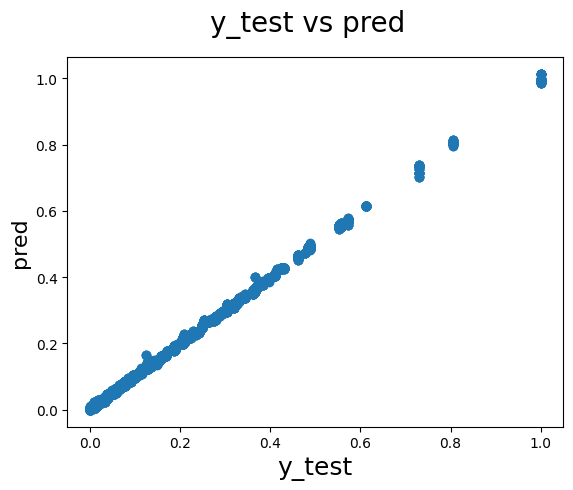

In [71]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(test[target], y_pred)
fig.suptitle('y_test vs pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('pred', fontsize=16)   

## Naïve Bayes classifier

Accuracy: 0.9088655295517651


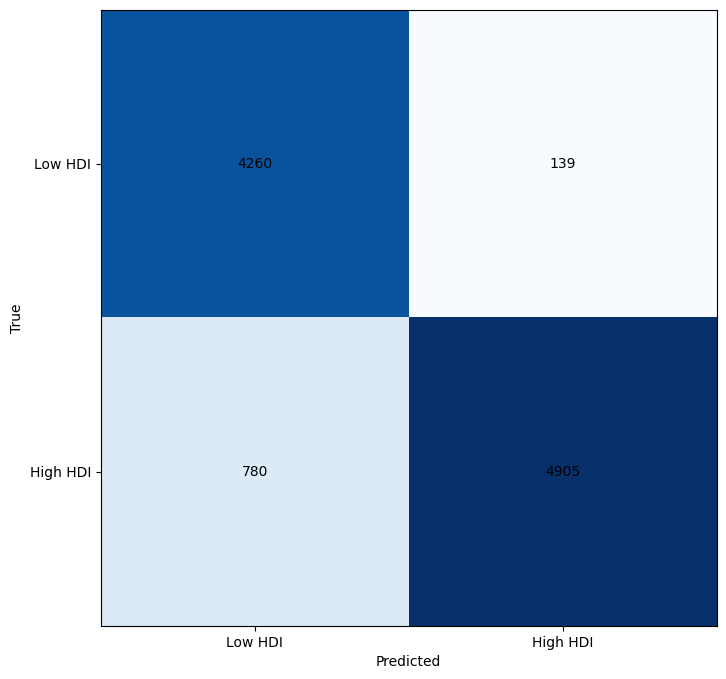

In [85]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix


# Select the relevant columns for classification
features = ['total_cases', 'total_deaths', 'stringency_index', 'population', 'gdp_per_capita', 'human_development_index']
data = df1
# Convert the 'human_development_index' column into binary outcomes
data['hdi_binary'] = data['human_development_index'].apply(lambda x: 1 if x >= data['human_development_index'].mean() else 0)

# Split the dataset into training and testing data
train, test = train_test_split(data, test_size=0.2, random_state=42)

# Train the Naive Bayes classifier
gnb = GaussianNB()
gnb.fit(train[features], train['hdi_binary'])

# Predict the outcomes for the testing data
y_pred = gnb.predict(test[features])

# Evaluate the performance of the classifier
accuracy = accuracy_score(test['hdi_binary'], y_pred)
print('Accuracy:', accuracy)

# Create a confusion matrix
cm = confusion_matrix(test['hdi_binary'], y_pred)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm, cmap='Blues')
ax.grid(False)
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(['Low HDI', 'High HDI'])
ax.set_yticklabels(['Low HDI', 'High HDI'])
for i in range(2):
    for j in range(2):
        ax.text(j, i, str(cm[i][j]), ha='center', va='center', color='black')
plt.show()


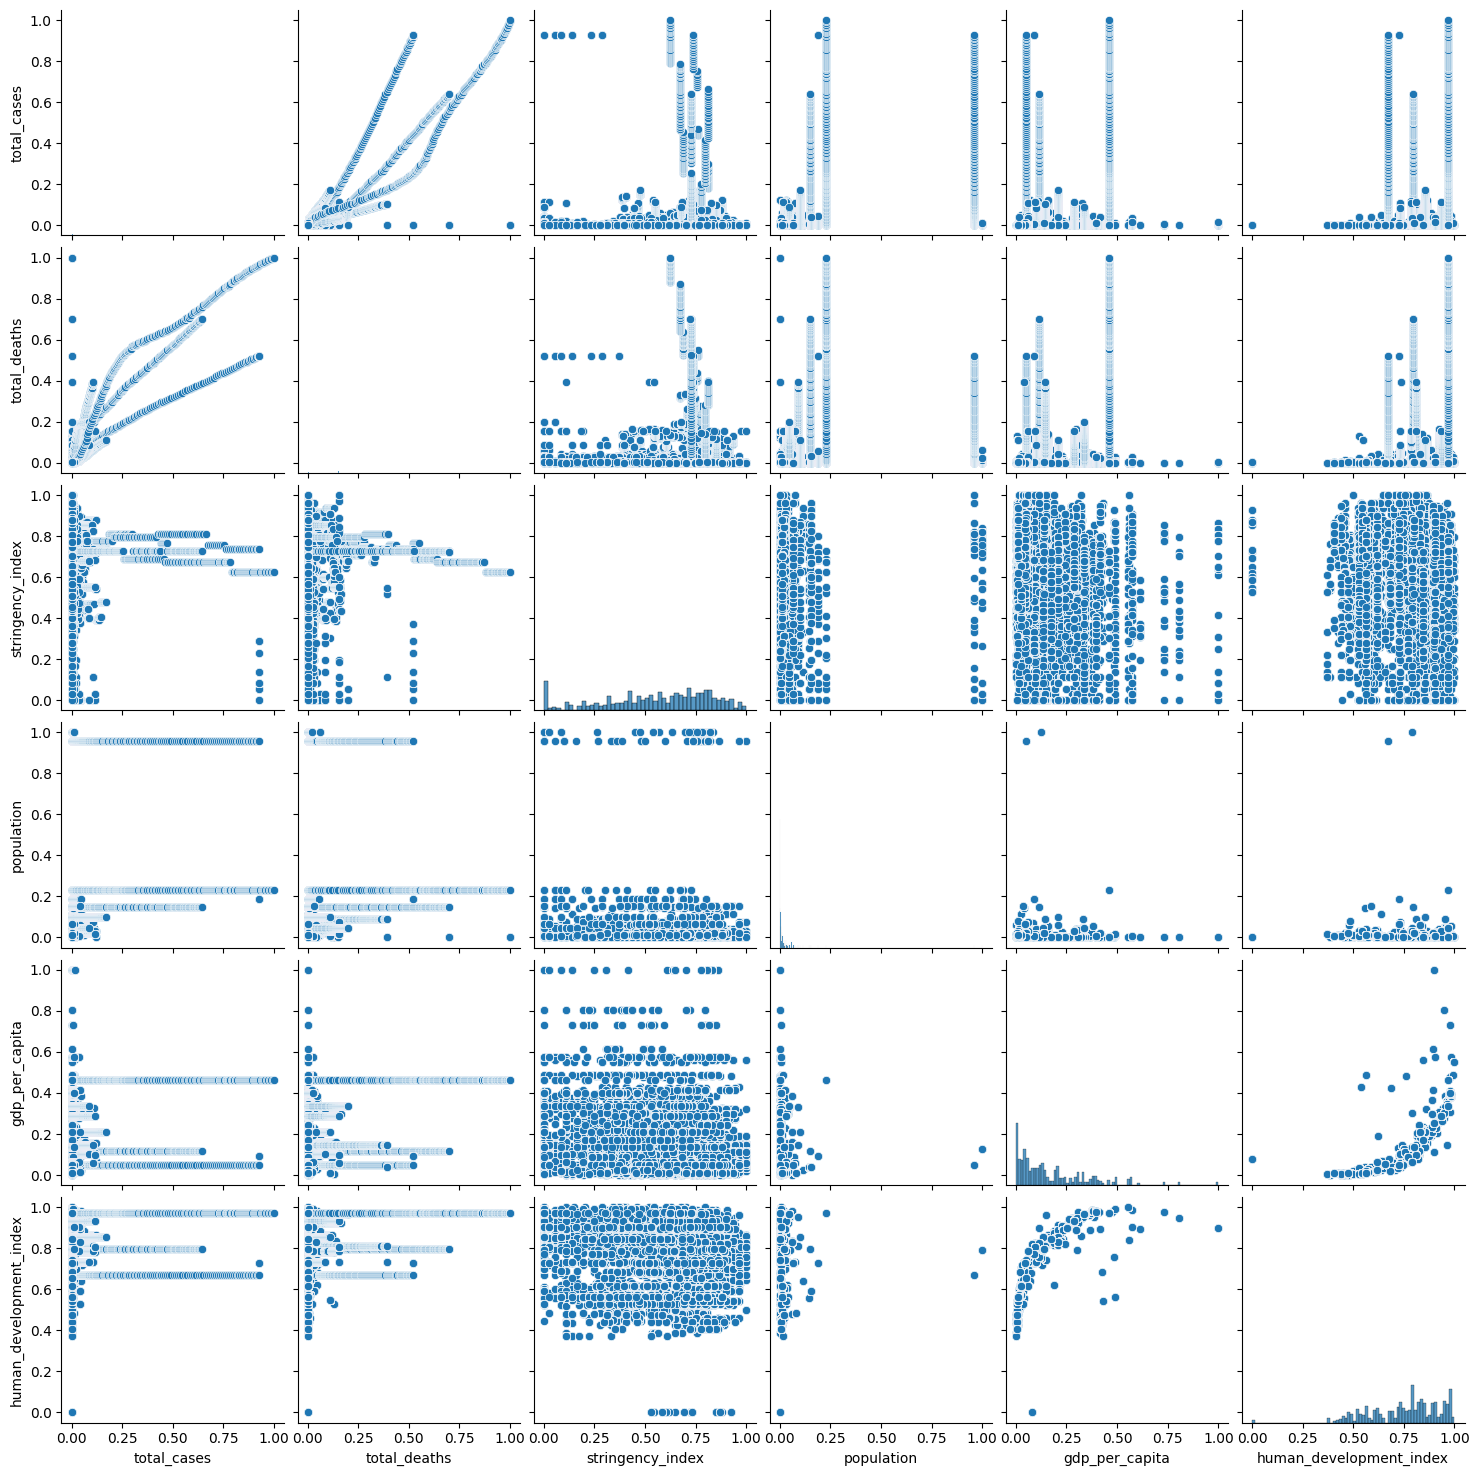

                         total_cases  total_deaths  stringency_index  \
total_cases                 1.000000      0.807131          0.021452   
total_deaths                0.807131      1.000000          0.033894   
stringency_index            0.021452      0.033894          1.000000   
population                  0.270960      0.222666          0.041712   
gdp_per_capita              0.037268      0.083966         -0.197973   
human_development_index     0.066357      0.133112         -0.173334   

                         population  gdp_per_capita  human_development_index  
total_cases                0.270960        0.037268                 0.066357  
total_deaths               0.222666        0.083966                 0.133112  
stringency_index           0.041712       -0.197973                -0.173334  
population                 1.000000       -0.067904                -0.018080  
gdp_per_capita            -0.067904        1.000000                 0.667420  
human_development_ind

In [83]:

# Load the dataset
data = df1

# Compute the Pearson correlation coefficients
corr = data[['total_cases', 'total_deaths', 'stringency_index', 'population', 'gdp_per_capita', 'human_development_index']].corr()

# Visualize the pairwise relationships using scatterplots
sns.pairplot(data[['total_cases', 'total_deaths', 'stringency_index', 'population', 'gdp_per_capita', 'human_development_index']])
plt.show()

# Print the correlation matrix
print(corr)



In [81]:

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Convert the 'GDP_growth_rate' column into binary outcomes
data = df1
data['GDP_growth_binary'] = data['gdp_per_capita'].apply(lambda x: 1 if x >= 0 else 0)

#print(data['gdp_per_capita'].unique())

# Select the features to be used for classification
features = ['total_cases', 'total_deaths', 'stringency_index', 'population', 'gdp_per_capita', 'human_development_index']

# Split the dataset into training and testing data
train, test = train_test_split(data, test_size=0.2, random_state=42)

# Train the Naive Bayes classifier
gnb = GaussianNB()
gnb.fit(train[features], train['GDP_growth_binary'])

# Predict the outcomes for the testing data
y_pred = gnb.predict(test[features])

# Evaluate the performance of the classifier
accuracy = accuracy_score(test['GDP_growth_binary'], y_pred)
print('Accuracy:', accuracy)


Accuracy: 1.0
